# Example of Training with MotionSense

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import pandas as pd
from pathlib import Path

sys.path.append("..")

## Read Processed Data

In [3]:
from librep.utils.dataset import PandasDatasetsIO

In [4]:
dataset_path = Path("../data/views/MotionSense/balanced_view")
train, validation, test = PandasDatasetsIO(dataset_path).load()

In [5]:
train = pd.concat([train, validation], ignore_index=True)
train

,Unnamed: 0,attitude.roll-0,attitude.roll-1,attitude.roll-2,attitude.roll-3,attitude.roll-4,attitude.roll-5,attitude.roll-6,attitude.roll-7,attitude.roll-8,...,userAcceleration.z-295,userAcceleration.z-296,userAcceleration.z-297,userAcceleration.z-298,userAcceleration.z-299,activity code,length,trial_code,index,user
0,0,1.093387,1.129419,1.166286,1.176539,1.218638,1.218076,1.169095,1.104227,1.041327,...,0.025803,0.015770,0.109555,0.172113,0.248941,0,300,1,1200,16
1,1,1.528132,1.527992,1.527765,1.516768,1.493941,1.476302,1.455153,1.441702,1.443440,...,0.578416,0.572674,0.490945,0.345010,0.129649,0,300,1,0,1
2,2,-1.331274,-1.315688,-1.315034,-1.315621,-1.287623,-1.218232,-1.139884,-1.054611,-0.970854,...,0.102089,0.124263,0.122183,0.125418,0.230901,0,300,2,600,21
3,3,0.715184,0.679044,0.662668,0.662928,0.670537,0.666622,0.652839,0.662879,0.723967,...,-0.033105,0.119528,0.057709,-0.057865,-0.097547,0,300,11,0,7
4,4,-2.004835,-2.041697,-2.044302,-2.038474,-2.055756,-2.102689,-2.158746,-2.202283,-2.232511,...,0.072444,0.005214,-0.231522,-0.560348,-0.678777,0,300,2,1800,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,325,-0.809114,-0.504596,-0.200415,-0.069472,-0.009363,-0.019789,-0.084377,-0.162347,-0.184036,...,-0.754819,-0.570919,-1.006368,-1.232031,-0.321935,5,300,16,0,6
1910,326,1.225254,1.219554,1.262265,1.213586,1.229215,1.309294,1.371141,1.403459,1.491145,...,1.737598,1.105376,-0.184008,-1.426659,-1.711004,5,300,9,4500,2
1911,327,3.138105,-3.105622,-3.073557,-3.034694,-2.983038,-2.938967,-2.891639,-2.733605,-1.150408,...,-1.048692,-0.806513,-0.533924,1.383309,-0.669395,5,300,9,0,6
1912,328,1.476984,1.582842,1.692089,1.797948,1.852740,1.886674,1.885654,1.810233,1.708376,...,-0.326163,-0.657696,-0.787899,0.421130,0.055916,5,300,9,600,2


## Create the MotionSense Dataset

In [6]:
from librep.datasets.common import PandasMultiModalDataset

In [7]:
features = [
    "userAcceleration.x",
    "userAcceleration.y",
    "userAcceleration.z",
    "rotationRate.x",
    "rotationRate.y",
    "rotationRate.z"
]

train_dataset = PandasMultiModalDataset(
    train,
    feature_prefixes=features,
    label_columns="activity code",
    as_array=True
)
validation_dataset = PandasMultiModalDataset(
    validation,
    feature_prefixes=features,
    label_columns="activity code",
    as_array=True
)
test_dataset = PandasMultiModalDataset(
    test,
    feature_prefixes=features,
    label_columns="activity code",
    as_array=True
)

In [8]:
train_dataset[0]

(array([-0.120843,  0.470622,  0.269861, ..., -0.046833, -0.283947,
        -0.521564]),
 0)

In [9]:
train_dataset.window_slices, train_dataset.window_names, train_dataset.num_windows

([(0, 300), (300, 600), (600, 900), (900, 1200), (1200, 1500), (1500, 1800)],
 ['userAcceleration.x',
  'userAcceleration.y',
  'userAcceleration.z',
  'rotationRate.x',
  'rotationRate.y',
  'rotationRate.z'],
 6)

In [10]:
from librep.datasets.common import TransformMultiModalDataset
from librep.transforms.fft import FFT

In [11]:
fft_transform = FFT()
transformer = TransformMultiModalDataset(transforms=[fft_transform], new_window_name_prefix="fft.")
train_dataset_fft = transformer(train_dataset)
validation_dataset_fft = transformer(validation_dataset)
test_dataset_fft = transformer(test_dataset)
train_dataset_fft.window_slices, train_dataset_fft.window_names, train_dataset_fft.num_windows

([(0, 300), (300, 600), (600, 900), (900, 1200), (1200, 1500), (1500, 1800)],
 ['fft.userAcceleration.x',
  'fft.userAcceleration.y',
  'fft.userAcceleration.z',
  'fft.rotationRate.x',
  'fft.rotationRate.y',
  'fft.rotationRate.z'],
 6)

In [12]:
from librep.datasets.common import TransformMultiModalDataset
from librep.transforms.fft import FFT
from librep.transforms.stats import StatsTransform

fft_transform = FFT()
stats_transform = StatsTransform()
transformer = TransformMultiModalDataset(transforms=[fft_transform, stats_transform], new_window_name_prefix="fft-stats.")
train_dataset_fft_stats = transformer(train_dataset)
validation_dataset_fft_stats = transformer(validation_dataset)
test_dataset_fft_stats = transformer(test_dataset)
train_dataset_fft_stats.window_slices, train_dataset_fft_stats.window_names, train_dataset_fft_stats.num_windows

([(0, 19), (19, 38), (38, 57), (57, 76), (76, 95), (95, 114)],
 ['fft-stats.fft-stats.userAcceleration.x',
  'fft-stats.fft-stats.userAcceleration.y',
  'fft-stats.fft-stats.userAcceleration.z',
  'fft-stats.fft-stats.rotationRate.x',
  'fft-stats.fft-stats.rotationRate.y',
  'fft-stats.fft-stats.rotationRate.z'],
 6)

In [13]:
from librep.datasets.common import combine_multi_modal_datasets
combined_train_dset = combine_multi_modal_datasets(train_dataset_fft, train_dataset_fft_stats)
combined_test_dset = combine_multi_modal_datasets(test_dataset_fft, test_dataset_fft_stats)
combined_train_dset.window_slices, combined_train_dset.window_names, combined_train_dset.num_windows

([(0, 300),
  (300, 600),
  (600, 900),
  (900, 1200),
  (1200, 1500),
  (1500, 1800),
  (1800, 1819),
  (1819, 1838),
  (1838, 1857),
  (1857, 1876),
  (1876, 1895),
  (1895, 1914)],
 ['fft.userAcceleration.x',
  'fft.userAcceleration.y',
  'fft.userAcceleration.z',
  'fft.rotationRate.x',
  'fft.rotationRate.y',
  'fft.rotationRate.z',
  'fft-stats.fft-stats.userAcceleration.x',
  'fft-stats.fft-stats.userAcceleration.y',
  'fft-stats.fft-stats.userAcceleration.z',
  'fft-stats.fft-stats.rotationRate.x',
  'fft-stats.fft-stats.rotationRate.y',
  'fft-stats.fft-stats.rotationRate.z'],
 12)

## Train

In [39]:
from librep.utils.workflow import SimpleTrainEvalWorkflow, MultiRunWorkflow
from librep.estimators import RandomForestClassifier
from librep.metrics.report import ClassificationReport
import yaml

reporter = ClassificationReport(use_accuracy=True, use_f1_score=True, use_classification_report=False, use_confusion_matrix=False)
experiment = SimpleTrainEvalWorkflow(estimator=RandomForestClassifier, do_not_instantiate=False, do_fit=True, evaluator=reporter)
multi_run_experiment = MultiRunWorkflow(workflow=experiment, num_runs=3, debug=False)

In [40]:
result = multi_run_experiment(train_dataset, [test_dataset, validation_dataset, test_dataset])
print(yaml.dump(result))

runs:
- end: 1661357467.8791676
  result:
  - accuracy: 0.8333333333333334
    f1 score (macro): 0.8308548014015757
    f1 score (micro): 0.8333333333333334
    f1 score (weighted): 0.8358118652650909
  - accuracy: 1.0
    f1 score (macro): 1.0
    f1 score (micro): 1.0
    f1 score (weighted): 1.0
  - accuracy: 0.8333333333333334
    f1 score (macro): 0.8308548014015757
    f1 score (micro): 0.8333333333333334
    f1 score (weighted): 0.8358118652650909
  run id: 1
  start: 1661357464.2828083
  time taken: 3.5963592529296875
- end: 1661357471.492173
  result:
  - accuracy: 0.8089430894308943
    f1 score (macro): 0.8034815197811039
    f1 score (micro): 0.8089430894308943
    f1 score (weighted): 0.8144046590806847
  - accuracy: 1.0
    f1 score (macro): 1.0
    f1 score (micro): 1.0
    f1 score (weighted): 1.0
  - accuracy: 0.8089430894308943
    f1 score (macro): 0.8034815197811039
    f1 score (micro): 0.8089430894308943
    f1 score (weighted): 0.8144046590806847
  run id: 2
  st

In [ ]:
result = multi_run_experiment(train_dataset_fft, test_dataset_fft)
print(yaml.dump(result))

In [ ]:
result = multi_run_experiment(train_dataset_fft_stats, test_dataset_fft_stats)
print(yaml.dump(result))

In [ ]:
result = multi_run_experiment(combined_train_dset, combined_test_dset)
print(yaml.dump(result))

In [30]:
experiment = SimpleTrainEvalWorkflow(estimator=RandomForestClassifier, do_not_instantiate=False, evaluator=classification_report)
print(experiment(train_dataset_fft, test_dataset_fft))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        88
           1       0.80      0.89      0.85        74
           2       0.79      0.89      0.84        73
           3       0.90      0.81      0.86        91
           4       0.98      0.93      0.95        86
           5       0.93      0.95      0.94        80

    accuracy                           0.88       492
   macro avg       0.88      0.88      0.88       492
weighted avg       0.88      0.88      0.88       492



In [32]:
experiment = SimpleTrainEvalWorkflow(estimator=RandomForestClassifier(), evaluator=classification_report)
print(experiment(train_dataset_fft_stats, test_dataset_fft_stats))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        80
           1       0.93      0.85      0.89        89
           2       0.84      0.88      0.86        78
           3       0.89      0.85      0.87        86
           4       0.83      0.93      0.88        73
           5       1.00      0.95      0.98        86

    accuracy                           0.91       492
   macro avg       0.91      0.91      0.91       492
weighted avg       0.91      0.91      0.91       492



## Transform using FFT

In [18]:
from librep.transforms.fft import FFT
from librep.utils.transform import TransformMultiModalDataset, WindowedTransform

fft_transform = FFT()
windowed_fft = WindowedTransform(fft_transform, window_size=train_dataset.window_size)
transformer = TransformMultiModalDataset(transforms=[windowed_fft])

In [19]:
train_dataset = transformer(train_dataset)
validation_dataset = transformer(validation_dataset)
test_dataset = transformer(test_dataset)

In [20]:
print(train_dataset[0])

(array([10.552792  , 10.37517334,  2.77238079, ...,  0.6733317 ,
       19.68947128, 43.23490809]), 0)


## Classify using Random Forest

In [18]:
from librep.estimators import RandomForestClassifier
from librep.metrics import classification_report

In [19]:
model = RandomForestClassifier()
model.fit(train_dataset[:][0], train_dataset[:][1])

RandomForestClassifier()

In [20]:
y_pred = model.predict(test_dataset[:][0])

In [21]:
print(classification_report(test_dataset[:][1], y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        82
           1       0.76      0.71      0.73        82
           2       0.95      0.74      0.84        82
           3       0.79      0.96      0.87        82
           4       0.62      0.61      0.61        82
           5       0.92      0.96      0.94        82

    accuracy                           0.79       492
   macro avg       0.80      0.79      0.79       492
weighted avg       0.80      0.79      0.79       492



## Visualize Confusion Matrix

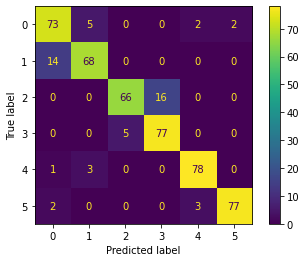

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(test_dataset[:][1], y_pred)

## Do all of this using a Experiment Helper

In [27]:
from librep.utils.workflow import SimpleTrainEvalWorkflow

experiment = SimpleTrainEvalWorkflow(estimator=RandomForestClassifier(), transforms=[windowed_fft], evaluator=classification_report)
print(experiment(train_dataset, test_dataset))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82       105
           1       0.90      0.94      0.92        79
           2       0.79      0.90      0.84        72
           3       0.91      0.82      0.86        92
           4       0.77      0.88      0.82        72
           5       0.85      0.97      0.91        72

    accuracy                           0.86       492
   macro avg       0.86      0.87      0.86       492
weighted avg       0.87      0.86      0.86       492

